<a href="https://colab.research.google.com/github/stay-deaths/NLPNeuralNetwork/blob/master/NLPNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Appendix

Please see this link to access the appendix https://colab.research.google.com/drive/1FoA8W83fKYAM4lsVrqWpyn5Vjwz6-wwR

## Data Processing for embedding

In [ ]:
## General Importing 
import string
import numpy as np
import re
import pandas as pd
import sklearn.feature_extraction as skprep
from sklearn.metrics import roc_curve, auc
from itertools import compress
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(251121253)
%matplotlib inline

In [ ]:
# Keras imports
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, Reshape, MaxPooling1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten, Dense, Dropout, Lambda
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.metrics import categorical_crossentropy, categorical_accuracy
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image, sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Download the Data to be analyzed 

In [ ]:
!gdown  https://drive.google.com/uc?id=1XRQ-cAOpxAxUFEWcG3fA7twSg8Fmhx6l

Downloading...
From: https://drive.google.com/uc?id=1XRQ-cAOpxAxUFEWcG3fA7twSg8Fmhx6l
To: /content/Full_Data (1).zip
13.2MB [00:00, 116MB/s]


In [ ]:
!unzip '/content/Full_Data (1).zip'

Archive:  /content/Full_Data (1).zip
  inflating: Full_Data.csv           


In [ ]:
Text_data = pd.read_csv('Full_Data.csv')

### Download Glove

In [ ]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip

--2019-12-16 16:58:45--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2019-12-16 16:58:45--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2019-12-16 16:58:45--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Sav

### Download Fasttext 

In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
!unzip v0.9.1.zip

--2019-12-16 17:13:17--  https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/v0.9.1 [following]
--2019-12-16 17:13:17--  https://codeload.github.com/facebookresearch/fastText/zip/v0.9.1
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4327207 (4.1M) [application/zip]
Saving to: ‘v0.9.1.zip’

v0.9.1.zip          100%[===================>]   4.13M  19.9MB/s    in 0.2s    

2019-12-16 17:13:18 (19.9 MB/s) - ‘v0.9.1.zip’ saved [4327207/4327207]

Archive:  v0.9.1.zip
b5b7d307274ce00ef52198fbc692ed3bd11d9856
   creating: fastText-0.9.1/
   creating: fastText-0.9.1/.circleci/
  inflatin

In [ ]:
%cd fastText-0.9.1
!make

/content/fastText-0.9.1
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/meter.cc
c++ -pthread -std=c++0x -march=native -O3 -fun

In [ ]:
!ls

alignment		   fasttext.o		    README.md
args.o			   get-wikimedia.sh	    runtests.py
classification-example.sh  LICENSE		    scripts
classification-results.sh  loss.o		    setup.cfg
CMakeLists.txt		   Makefile		    setup.py
CODE_OF_CONDUCT.md	   MANIFEST.in		    src
CONTRIBUTING.md		   matrix.o		    tests
crawl			   meter.o		    utils.o
densematrix.o		   model.o		    vector.o
dictionary.o		   productquantizer.o	    website
docs			   python		    wikifil.pl
eval.py			   quantization-example.sh  word-vector-example.sh
fasttext		   quantmatrix.o


### Processing the data in a way that Fasttext and Glove can use it 

This include processing all the puntucation marks etc.

we will clean the text as following: 

1. Remove any URLs present in tweets as they are not significant in sentiment analysis.
2. Replace any emojis with the text they represent as emojis or emoticons plays an important role in representing a sentiment.
3. Replace contractions with their full forms.
7. Remove mentions as they also do not weigh in sentiment analyzing.
5. Remove punctuations. 
6. Remove some of the stopwords that is not going to help on analyzing the sentiment 


In [ ]:
%cd /content

/content


In [ ]:
!ls

 fastText-0.9.1       Full_Data.csv	   sample_data
'Full_Data (1).zip'   glove.42B.300d.zip   v0.9.1.zip


In [ ]:
!pip install textsearch

     |████████████████████████████████| 245kB 5.0MB/s 
     |████████████████████████████████| 317kB 45.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81710 sha256=f587a0dada58d26498875687375c2f49f7d21c52e4521c4c48330a0205714e6f
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [ ]:
!pip install contractions
import contractions

In [ ]:
##Function to remove URl 
def remove_URL(text):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", text)


From the website, we have the following dictionary of Emoicons 

In [ ]:
EMOTICONS = {
    u":‑)":"Happy face or smiley",
    u":)":"Happy face or smiley",
    u":-]":"Happy face or smiley",
    u":]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-)":"Happy face smiley",
    u":o)":"Happy face smiley",
    u":-}":"Happy face smiley",
    u":}":"Happy face smiley",
    u":-)":"Happy face smiley",
    u":c)":"Happy face smiley",
    u":^)":"Happy face smiley",
    u"=]":"Happy face smiley",
    u"=)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B^D":"Laughing, big grin or laugh with glasses",
    u":-))":"Very happy",
    u":-(":"Frown, sad, andry or pouting",
    u":‑(":"Frown, sad, andry or pouting",
    u":(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑[":"Frown, sad, andry or pouting",
    u":[":"Frown, sad, andry or pouting",
    u":-||":"Frown, sad, andry or pouting",
    u">:[":"Frown, sad, andry or pouting",
    u":{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:(":"Frown, sad, andry or pouting",
    u":'‑(":"Crying",
    u":'(":"Crying",
    u":'‑)":"Tears of happiness",
    u":')":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-*":"Kiss",
    u":*":"Kiss",
    u":X":"Kiss",
    u";‑)":"Wink or smirk",
    u";)":"Wink or smirk",
    u"*-)":"Wink or smirk",
    u"*)":"Wink or smirk",
    u";‑]":"Wink or smirk",
    u";]":"Wink or smirk",
    u";^)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑|":"Straight face",
    u":|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑)":"Angel, saint or innocent",
    u"O:)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑)":"Angel, saint or innocent",
    u"0:)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;^)":"Angel, saint or innocent",
    u">:‑)":"Evil or devilish",
    u">:)":"Evil or devilish",
    u"}:‑)":"Evil or devilish",
    u"}:)":"Evil or devilish",
    u"3:‑)":"Evil or devilish",
    u"3:)":"Evil or devilish",
    u">;)":"Evil or devilish",
    u"|;‑)":"Cool",
    u"|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑)":"Party all night",
    u"%‑)":"Drunk or confused",
    u"%)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑|":"Dump",
    u"(>_<)":"Troubled",
    u"(>_<)>":"Troubled",
    u"(';')":"Baby",
    u"(^^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(^_^;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(~_~;) (・.・;)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"(-_-)zzz":"Sleeping",
    u"(^_-)":"Wink",
    u"((+_+))":"Confused",
    u"(+o+)":"Confused",
    u"(o|o)":"Ultraman",
    u"^_^":"Joyful",
    u"(^_^)/":"Joyful",
    u"(^O^)／":"Joyful",
    u"(^o^)／":"Joyful",
    u"(__)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_(._.)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<(_ _)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m(__)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(__)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m(_ _)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"('_')":"Sad or Crying",
    u"(/_;)":"Sad or Crying",
    u"(T_T) (;_;)":"Sad or Crying",
    u"(;_;":"Sad of Crying",
    u"(;_:)":"Sad or Crying",
    u"(;O;)":"Sad or Crying",
    u"(:_;)":"Sad or Crying",
    u"(ToT)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q.Q":"Sad or Crying",
    u"T.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"(-.-)":"Shame",
    u"(-_-)":"Shame",
    u"(一一)":"Shame",
    u"(；一_一)":"Shame",
    u"(=_=)":"Tired",
    u"(=^·^=)":"cat",
    u"(=^··^=)":"cat",
    u"=_^= ":"cat",
    u"(..)":"Looking down",
    u"(._.)":"Looking down",
    u"^m^":"Giggling with hand covering mouth",
    u"(・・?":"Confusion",
    u"(?_?)":"Confusion",
    u">^_^<":"Normal Laugh",
    u"<^!^>":"Normal Laugh",
    u"^/^":"Normal Laugh",
    u"（*^_^*）" :"Normal Laugh",
    u"(^<^) (^.^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^.^)":"Normal Laugh",
    u"(^_^.)":"Normal Laugh",
    u"(^_^)":"Normal Laugh",
    u"(^^)":"Normal Laugh",
    u"(^J^)":"Normal Laugh",
    u"(*^.^*)":"Normal Laugh",
    u"(^—^）":"Normal Laugh",
    u"(#^.^#)":"Normal Laugh",
    u"（^—^）":"Waving",
    u"(;_;)/~~~":"Waving",
    u"(^.^)/~~~":"Waving",
    u"(-_-)/~~~ ($··)/~~~":"Waving",
    u"(T_T)/~~~":"Waving",
    u"(ToT)/~~~":"Waving",
    u"(*^0^*)":"Excited",
    u"(*_*)":"Amazed",
    u"(*_*;":"Amazed",
    u"(+_+) (@_@)":"Amazed",
    u"(*^^)v":"Laughing,Cheerful",
    u"(^_^)v":"Laughing,Cheerful",
    u"((d[-_-]b))":"Headphones,Listening to music",
    u'(-"-)':"Worried",
    u"(ーー;)":"Worried",
    u"(^0_0^)":"Eyeglasses",
    u"(＾ｖ＾)":"Happy",
    u"(＾ｕ＾)":"Happy",
    u"(^)o(^)":"Happy",
    u"(^O^)":"Happy",
    u"(^o^)":"Happy",
    u")^o^(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o.O":"Surpised",
    u"(o.o)":"Surprised",
    u"oO":"Surprised",
    u"(*￣m￣)":"Dissatisfied",
    u"(‘A`)":"Snubbed or Deflated"

}

In [ ]:
EMOTICONS2 = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
EMOTICONS.update(EMOTICONS2)

In [ ]:
!pip install emoji --upgrade

     |████████████████████████████████| 51kB 2.0MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42175 sha256=c4fa1fe7b947d671d4e24272aa383fb3cc1f261c2d62d67d13929e12679ec7a8
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [ ]:
import emoji

In [ ]:
def convert_emoji(text): 
  text = emoji.demojize(text)
  text = text.replace(":"," ")
  return text

In [ ]:
##Function to replace the Emoticons 
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = text.replace(emot, EMOTICONS[emot])
    return text

In [ ]:
## Functions to replace contractions
def replace_contractions(text):
    return contractions.fix(text)


In [ ]:
def normalize_text (text): 
  text = remove_URL(text)
  text = convert_emoticons(text)
  text = convert_emoji(text)
  text = replace_contractions(text)
  text = ' '.join(text.split())
  return text


In [ ]:
Text_data.head()

,text,sentiment,confidence
0,trying to wait a patient as i can lol,1,0.3
1,"Good morning Fotopro Team, I noticed in some ...",1,0.6
2,these still on track? ahead? behind?,1,0.2
3,any update on delivery?,1,0.0
4,product so nice had to get it twice,1,0.5


In [ ]:
## Normalize the text using the normalize_text function

Text_data.iloc[:,0] = [normalize_text(j) for j in Text_data.iloc[:,0]]

In [ ]:
Text_data.iloc[120,0]

'FYI if anyone wants a sholder strap pad I ended up getting the one located here'

In [ ]:
# Remove the punctuations for FastText

table = str.maketrans(' ', ' ', string.punctuation)
Text_data.iloc[:,0] = [j.translate(table) for j in Text_data.iloc[:,0]]


# Remove double space
Text_data.iloc[:,0] = [" ".join(j.split()) for j in Text_data.iloc[:,0]]



In [ ]:
frequent_stop = set(['the', 'a', 'an', 'and', 'to'])


In [ ]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in frequent_stop])


Text_data['text'] = Text_data['text'].apply(lambda text: remove_stopwords(text))

In [ ]:
Text_data['text'] = Text_data['text'].str.lower()

In [ ]:
Text_data.head()

,text,sentiment,confidence
0,trying wait patient as i can lol,1,0.3
1,good morning fotopro team i noticed in some of...,1,0.6
2,these still on track ahead behind,1,0.2
3,any update on delivery,1,0.0
4,product so nice had get it twice,1,0.5


### Apply the Linear Transformation to Confidence Level 

Since the confidence level ranged from 0 to 22, it is really hard to interpret its meaning. So we need to transform the range of confidence to [0,1]

In [ ]:
old_min = Text_data['confidence'].min(axis=0)
old_max = Text_data['confidence'].max(axis=0)
new_min = 0 
new_max = 1
Text_data['confidence'] = ( (Text_data['confidence'] - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

In [ ]:
Text_data['confidence'].describe()

count    204058.000000
mean          0.040472
std           0.040047
min           0.000000
25%           0.013453
50%           0.031390
75%           0.058296
max           1.000000
Name: confidence, dtype: float64

In [ ]:
len(Text_data.loc[Text_data['confidence'] == 0].index) 

22520

In [ ]:
Undertermined = Text_data.loc[Text_data['confidence'] == 0]

## Remove those undertermined rows from traning & testing data 

Useful_data = Text_data.drop(Text_data[Text_data['confidence'] == 0].index, axis = 0)

In [ ]:
len(Useful_data) + len (Undertermined)

204058

## Statistics of words

Most repreated words

In [ ]:
from collections import Counter
cnt = Counter()
for text in Text_data['text'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('i', 195186),
 ('you', 114632),
 ('is', 104459),
 ('it', 100900),
 ('for', 87645),
 ('of', 80481),
 ('not', 80328),
 ('have', 77570),
 ('in', 69203),
 ('my', 62892)]

Avg. no of words: 27.56
Std. deviation: 25.47
Max words: 1084
Min words: 0


Text(14.375, 0.5, 'Proportion')

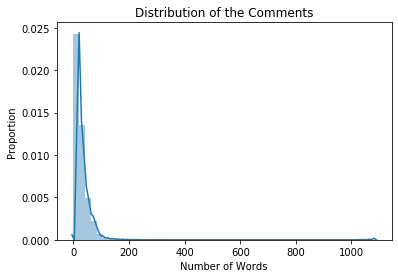

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats

# Count maximum number of words per file.
wordDist = [len(w.split()) for w in Text_data.iloc[:,0]]
print('Avg. no of words: ' + str(np.round(np.mean(wordDist), 2)))
print('Std. deviation: ' + str(np.round(np.std(wordDist), 2)))
print('Max words: ' + str(np.max(wordDist)))
print('Min words: ' + str(np.min(wordDist)))

# Generate the plot
distCD = sns.distplot(wordDist)

# I'm saving the image to a PDF, as it makes it easier later to download.
distCD.figure.savefig("wordDist.pdf", format = "pdf")
plt.title('Distribution of the Comments')
plt.xlabel('Number of Words')
plt.ylabel('Proportion')

## Embedding & Neural Network

In [ ]:
tokenizer = Tokenizer() # Creates tokenizer model.
tokenizer.fit_on_texts(Text_data.iloc[:,0]) # Trains it over the tokens that we have.

In [ ]:
# Import relevant packages
import os
import codecs

# Get words
Vals = list(tokenizer.word_index.keys())

# Write CSV with the output.
file = codecs.open('CrowdfundingWords.csv', "w", "utf-8")

for item in Vals:
    file.write("%s\r\n" % item)
    
file.close()

In [ ]:
!ls

 CrowdfundingWords.csv	'Full_Data (1).zip'   glove.42B.300d.zip   v0.9.1.zip
 fastText-0.9.1		 Full_Data.csv	      sample_data	   wordDist.pdf


In [ ]:
!head CrowdfundingWords.csv

i
you
is
it
for
of
not
have
in
my


In [ ]:
# Create word index from input
used_sequences = tokenizer.texts_to_sequences(Useful_data.iloc[:,0]) # Create the sequences.
undetermined_sequences = tokenizer.texts_to_sequences(Undertermined.iloc[:,0])

# Creates the indexes. Word index is a dictionary with words in it.
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Creates the training dataset, adding padding when necessary.
used_data = pad_sequences(used_sequences, maxlen=175, 
                     padding = 'pre') # add padding at the end. No difference in practice.

undetermined_data = pad_sequences(undetermined_sequences, maxlen=175, 
                     padding = 'pre')

# Creates the objective function
used_labels = Useful_data.iloc[:,1]
undetermind_labels = Undertermined.iloc[:,1]

print('Shape of used_data tensor:', used_data.shape)
print('Shape of used_label tensor:', used_labels.shape)

print('Shape of undetermined_data tensor:', undetermined_data.shape)
print('Shape of undetermined_label tensor:', undetermind_labels.shape)

Found 108356 unique tokens.
Shape of used_data tensor: (181538, 175)
Shape of used_label tensor: (181538,)
Shape of undetermined_data tensor: (22520, 175)
Shape of undetermined_label tensor: (22520,)


In [ ]:

# Create saving directory
!mkdir Preprocessed_data

# Save outputs
np.savetxt("Preprocessed_data/useful_Data.txt", used_data)
np.savetxt("Preprocessed_data/useful_Labels.txt", used_labels)
np.savetxt("Preprocessed_data/undetermined_Data.txt", undetermined_data)
np.savetxt("Preprocessed_data/undetermined_Label.txt", undetermind_labels)


### Embedding with Glove

In [ ]:
!ls

 CrowdfundingWords.csv	 Full_Data.csv	      sample_data
 fastText-0.9.1		 glove.42B.300d.zip   v0.9.1.zip
'Full_Data (1).zip'	 Preprocessed_data    wordDist.pdf


In [ ]:
!unzip glove.42B.300d.zip

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [ ]:
embeddings_index_Glove = {}
f = open(os.path.join('/content', 'glove.42B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_Glove[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_Glove))

Found 1917494 word vectors.


In [ ]:
len(word_index)

108356

In [ ]:
embedding_matrix_Glove = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index_Glove.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_Glove[i] = embedding_vector

In [ ]:
embedding_matrix_Glove.shape

(108357, 300)

In [ ]:
# Create saving directory
!mkdir GloveEmbed

# Save outputs
np.savetxt("GloveEmbed/embedding_matrix_Glove.txt", embedding_matrix_Glove)

In [ ]:
!zip -r GloveEmbed.zip GloveEmbed

  adding: GloveEmbed/ (stored 0%)
  adding: GloveEmbed/embedding_matrix_Glove.txt (deflated 74%)


In [ ]:
# Download files

from google.colab import files
files.download("GloveEmbed.zip")

### Embedding with Fasttext

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip

--2019-12-16 17:21:25--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.6.166, 104.20.22.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.6.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5828358084 (5.4G) [application/zip]
Saving to: ‘crawl-300d-2M-subword.zip’

crawl-300d-2M-subwo 100%[===================>]   5.43G  13.2MB/s    in 6m 27s  

2019-12-16 17:27:53 (14.4 MB/s) - ‘crawl-300d-2M-subword.zip’ saved [5828358084/5828358084]



In [ ]:
!unzip crawl-300d-2M-subword.zip

Archive:  crawl-300d-2M-subword.zip
  inflating: crawl-300d-2M-subword.vec  
  inflating: crawl-300d-2M-subword.bin  


In [ ]:
!./fastText-0.9.1/fasttext print-sentence-vectors crawl-300d-2M-subword.bin < CrowdfundingWords.csv > EmbeddingFunding_Fast.tsv

tcmalloc: large alloc 4800004096 bytes == 0x564c83ba0000 @  0x7f9bee7cc887 0x564c6fef68cf 0x564c6ff013e4 0x564c6ff01ed1 0x564c6ff0d873 0x564c6fed8ef8 0x7f9bed869b97 0x564c6fed8f8a
tcmalloc: large alloc 2400002048 bytes == 0x564da1d44000 @  0x7f9bee7cc887 0x564c6fef68cf 0x564c6ff01428 0x564c6ff01ed1 0x564c6ff0d873 0x564c6fed8ef8 0x7f9bed869b97 0x564c6fed8f8a


In [ ]:
!head EmbeddingFunding_Fast.tsv

0.018515 0.037727 -0.037647 -0.018836 -0.028652 0.043545 -0.030384 0.0056463 -0.055892 -0.020849 -0.017815 0.0050595 -0.0035742 0.021181 -0.033491 0.015327 0.015232 0.017131 -0.055853 0.057884 -0.027782 0.030735 -0.029555 0.056655 -0.036165 0.0024767 0.17513 -0.022459 0.035568 0.021659 -0.035267 0.02652 0.076035 0.0045169 0.0094958 -0.031279 0.020475 0.056861 0.025 0.0096693 -0.046519 0.073915 -0.0051212 -0.059595 0.0031767 -0.01224 -0.049278 0.010265 -0.091423 0.027489 -0.020392 -0.0037993 0.019315 0.083895 -0.071969 0.050647 0.00050342 -0.029988 0.017792 -0.028612 0.12855 -0.031431 -0.010962 0.015252 -0.034133 -0.035012 0.024947 -0.012201 0.019285 -0.083733 0.071543 -0.032141 -0.066946 0.011789 0.095391 0.038085 0.018671 -0.017046 -0.043015 -0.011832 0.043662 0.038214 -0.15316 -0.0041561 0.015247 -0.015126 -0.001815 -0.02779 -0.038934 -0.11076 0.02311 -0.035492 0.074457 0.057154 0.01657 0.12571 0.00035896 -0.030058 0.035588 0.010383 0.00089262 0.045677 -0.036284 0.042599 -0.010454 -0

In [ ]:
import fileinput

with fileinput.FileInput('EmbeddingFunding_Fast.tsv', inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(' ', ','), end='')

In [ ]:
import numpy as np
import os

# Create the first line
firstLine = ','.join(['D'+str(i) for i in np.arange(1, 301)]) + '\n'

# Open as read only. Read the file
with open('EmbeddingFunding_Fast.tsv', 'r') as original: 
  data = original.read()

# Open to write and write the first line and the rest
with open('EmbeddingFunding_Fast.csv', 'w') as modified: 
  modified.write(firstLine + data)

In [ ]:
!head EmbeddingFunding_Fast.csv

D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,D41,D42,D43,D44,D45,D46,D47,D48,D49,D50,D51,D52,D53,D54,D55,D56,D57,D58,D59,D60,D61,D62,D63,D64,D65,D66,D67,D68,D69,D70,D71,D72,D73,D74,D75,D76,D77,D78,D79,D80,D81,D82,D83,D84,D85,D86,D87,D88,D89,D90,D91,D92,D93,D94,D95,D96,D97,D98,D99,D100,D101,D102,D103,D104,D105,D106,D107,D108,D109,D110,D111,D112,D113,D114,D115,D116,D117,D118,D119,D120,D121,D122,D123,D124,D125,D126,D127,D128,D129,D130,D131,D132,D133,D134,D135,D136,D137,D138,D139,D140,D141,D142,D143,D144,D145,D146,D147,D148,D149,D150,D151,D152,D153,D154,D155,D156,D157,D158,D159,D160,D161,D162,D163,D164,D165,D166,D167,D168,D169,D170,D171,D172,D173,D174,D175,D176,D177,D178,D179,D180,D181,D182,D183,D184,D185,D186,D187,D188,D189,D190,D191,D192,D193,D194,D195,D196,D197,D198,D199,D200,D201,D202,D203,D204,D205,D206,D207,D208,D209,D210,D211,D212,D213,D214,D215,D216,D217,D218,D219,D220,D221,D22

In [ ]:
# Read word embeddings
Embeddings_Fasttext= pd.read_csv('EmbeddingFunding_Fast.csv', sep=',', decimal = '.', 
                         low_memory = True, index_col = False)
Embeddings_Fasttext.describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,D40,...,D261,D262,D263,D264,D265,D266,D267,D268,D269,D270,D271,D272,D273,D274,D275,D276,D277,D278,D279,D280,D281,D282,D283,D284,D285,D286,D287,D288,D289,D290,D291,D292,D293,D294,D295,D296,D297,D298,D299,D300
count,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,...,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000,108356.000000
mean,-0.019270,-0.019756,0.060673,0.009534,-0.009059,-0.070565,0.064043,0.001707,0.028754,-0.053534,-0.002112,-0.008417,-0.004462,0.008268,0.002110,-0.008079,0.009044,-0.003382,-0.003162,0.038518,-0.020404,-0.004180,0.012700,0.003057,-0.042860,0.011260,-0.077367,0.009621,-0.001921,-0.006259,-0.010304,-0.009050,0.007466,-0.005747,0.014997,0.000585,0.022602,0.016657,0.010807,0.007614,...,-0.002546,-0.006680,-0.011520,-0.015884,0.024088,0.008832,-0.004811,-0.008262,0.021457,0.012238,0.025167,-0.007396,-0.012859,-0.007443,0.000772,0.005738,-0.025425,0.018401,-0.014707,0.000101,-0.068285,-0.004764,0.002725,0.016221,-0.016654,-0.003008,-0.018804,-0.068791,-0.003535,0.016426,0.023593,0.014413,-0.063792,-0.022085,0.022255,0.043869,0.066748,0.000620,-0.023183,0.002559
std,0.036123,0.073797,0.064230,0.046206,0.045283,0.073810,0.075600,0.039038,0.058362,0.077806,0.039801,0.039155,0.039925,0.039288,0.041523,0.042719,0.039042,0.037942,0.069766,0.066490,0.081314,0.054346,0.041251,0.040535,0.072687,0.044781,0.066023,0.041769,0.039305,0.039334,0.042062,0.054969,0.040240,0.038969,0.046359,0.042029,0.044587,0.044970,0.040447,0.044467,...,0.043128,0.044420,0.043365,0.043157,0.048244,0.041911,0.038765,0.043024,0.054290,0.043326,0.053610,0.038041,0.083965,0.043557,0.038912,0.040647,0.056250,0.058313,0.040933,0.039149,0.068792,0.042008,0.038580,0.041880,0.039933,0.037927,0.045788,0.078168,0.039432,0.045264,0.048205,0.043220,0.073833,0.043340,0.043899,0.074118,0.065984,0.040180,0.052649,0.043707
min,-0.231400,-0.454080,-0.280250,-0.222680,-0.231170,-0.401990,-0.278130,-0.212250,-0.266560,-0.425310,-0.209170,-0.204710,-0.241780,-0.188810,-0.248430,-0.205540,-0.188620,-0.196710,-0.407430,-0.318490,-0.492790,-0.321460,-0.204220,-0.207410,-0.322300,-0.264080,-0.374460,-0.187570,-0.201860,-0.222360,-0.238840,-0.310590,-0.203460,-0.221260,-0.229860,-0.218100,-0.258390,-0.191330,-0.179430,-0.244530,...,-0.234470,-0.210860,-0.265270,-0.270900,-0.210780,-0.193020,-0.212280,-0.248690,-0.243330,-0.230000,-0.231430,-0.250320,-0.431480,-0.227820,-0.206090,-0.226890,-0.319010,-0.238290,-0.229330,-0.196520,-0.390860,-0.216980,-0.219850,-0.200540,-0.245600,-0.193240,-0.280320,-0.397160,-0.210240,-0.225690,-0.206530,-0.204440,-0.399940,-0.239820,-0.231220,-0.309870,-0.368850,-0.184800,-0.266720,-0.187090
25%,-0.040008,-0.060709,0.017764,-0.019577,-0.038647,-0.115530,0.015196,-0.021235,-0.006033,-0.105140,-0.026565,-0.032185,-0.025683,-0.014956,-0.021081,-0.035780,-0.014262,-0.025514,-0.044085,-0.003294,-0.058

In [ ]:
# Create embedding dictionary

EmbeddingsDict_Fast = dict(zip(Vals, Embeddings_Fasttext.values))

In [ ]:
used_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 342,
       123, 973,  21,   1,  20, 937], dtype=int32)

In [ ]:
# Create first matrix full with 0's
embedding_matrix_Fast = np.zeros((len(word_index) + 1, 300))

# Generate embeddings matrix
for word, i in word_index.items():
    embedding_vector = EmbeddingsDict_Fast.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_Fast[i] = embedding_vector

# Print what came out
embedding_matrix_Fast

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.018515  ,  0.037727  , -0.037647  , ..., -0.0037811 ,
         0.02121   , -0.0054264 ],
       [-0.0011453 , -0.14067   ,  0.10863   , ..., -0.04363   ,
         0.010488  , -0.016025  ],
       ...,
       [-0.060361  ,  0.07252   ,  0.0026688 , ..., -0.052618  ,
        -0.0019166 , -0.0031732 ],
       [ 0.013113  , -0.12469   ,  0.036819  , ...,  0.0073507 ,
        -0.00078115, -0.030591  ],
       [ 0.0020908 , -0.24629   ,  0.099815  , ...,  0.0083639 ,
         0.013606  , -0.030303  ]])

In [ ]:
embedding_matrix_Fast.shape

(108357, 300)

In [ ]:
# Create saving directory
!mkdir FastEmbed

# Save outputs
np.savetxt("FastEmbed/embedding_matrix_Fast", embedding_matrix_Fast)

In [ ]:
!zip -r FastEmbed.zip FastEmbed

  adding: FastEmbed/ (stored 0%)
  adding: FastEmbed/embedding_matrix_Fast (deflated 75%)


In [ ]:
# Download files

from google.colab import files
files.download("FastEmbed.zip")

In [ ]:
# We will also save the word dictionary
# A pickle file is a Python native file
import pickle
f = open("WordDictionary.pkl","wb") #write in binary mode
pickle.dump(word_index, f)
f.close()

In [ ]:
# Zip all files for download.

!zip -r Preprocessed_data.zip Preprocessed_data

In [ ]:
# Download files

from google.colab import files
files.download("Preprocessed_data.zip")

### Build the Architectures of the Neural Network

we first split the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(used_data, used_labels, 
                                                    test_size=0.33,
                                                    random_state=251121253, 
                                                    stratify = used_labels)

### My own sequential structure

In [ ]:
X_train

NameError: ignored

In [ ]:
Sequential_model = Sequential()

In [ ]:
embedding_layer_Glove = Embedding(len(word_index) + 1,           
                            300,                           
                            weights=[embedding_matrix_Glove],    
                            input_length=175,              
                            trainable=False)              

In [ ]:
embedding_layer_Fast = Embedding(len(word_index) + 1,           
                            300,                          
                            weights=[embedding_matrix_Fast],    
                            input_length=175,          
                            trainable=False)               

In [ ]:
Sequential_model.add(embedding_layer_Glove)

In [ ]:
Sequential_model.add(Conv1D(filters=64,           
                 kernel_size=1,        
                 padding='valid',       
                 activation='relu',     
                 strides=1)             
         )

In [ ]:
Sequential_model.add(Conv1D(filters=128,          
                 kernel_size=2,        
                 padding='valid',       
                 activation='relu',     
                 strides=1)             
         )

In [ ]:
Sequential_model.add(MaxPooling1D(pool_size = 4))

In [ ]:
Sequential_model.add(Conv1D(filters=64,           
                 kernel_size=2,         
                 padding='valid',      
                 activation='relu',     
                 strides=1)             
         )

In [ ]:
Sequential_model.add(MaxPooling1D(pool_size = 7))

In [ ]:
# Flatten
Sequential_model.add(Flatten())



Sequential_model.add(Dense(64, activation = 'relu'))
Sequential_model.add(Dropout(0.5))

Sequential_model.add(Dense(32, activation = 'relu'))
Sequential_model.add(Dropout(0.5))


# Output layer of size 1
Sequential_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
Sequential_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 175, 300)          32507100  
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 175, 64)           19264     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 174, 128)          16512     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 43, 128)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 42, 64)            16448     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 384)              

In [ ]:
# Use Adam as optimizer, with a binary_crossentropy error.
adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
Sequential_model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

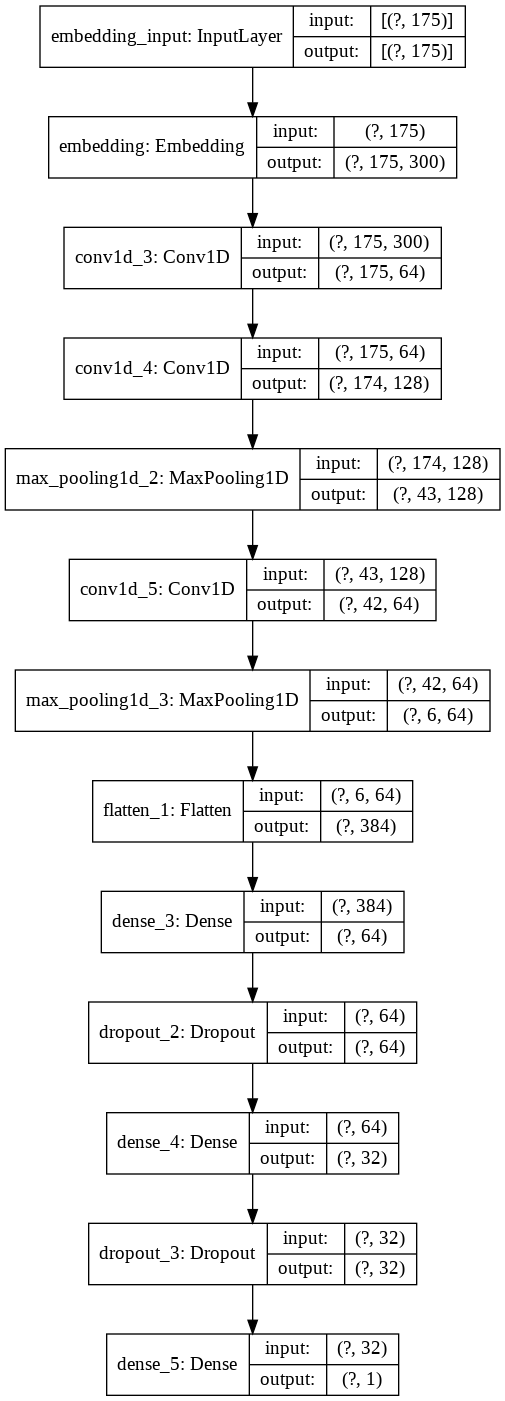

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(Sequential_model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

Train on 81492 samples, validate on 40138 samples
Epoch 1/28
81492/81492 [==============================] - 8s 101us/sample - loss: 0.6618 - acc: 0.6291 - val_loss: 0.6306 - val_acc: 0.6724
Epoch 2/28
81492/81492 [==============================] - 8s 97us/sample - loss: 0.6215 - acc: 0.6709 - val_loss: 0.5703 - val_acc: 0.6724
Epoch 3/28
81492/81492 [==============================] - 8s 99us/sample - loss: 0.5373 - acc: 0.7030 - val_loss: 0.4810 - val_acc: 0.7630
Epoch 4/28
81492/81492 [==============================] - 8s 98us/sample - loss: 0.4793 - acc: 0.7596 - val_loss: 0.4395 - val_acc: 0.7876
Epoch 5/28
81492/81492 [==============================] - 8s 98us/sample - loss: 0.4474 - acc: 0.7855 - val_loss: 0.4147 - val_acc: 0.8021
Epoch 6/28
81492/81492 [==============================] - 8s 99us/sample - loss: 0.4247 - acc: 0.8015 - val_loss: 0.4008 - val_acc: 0.8081
Epoch 7/28
81492/81492 [==============================] - 8s 99us/sample - loss: 0.4115 - acc: 0.8096 - val_loss: 0

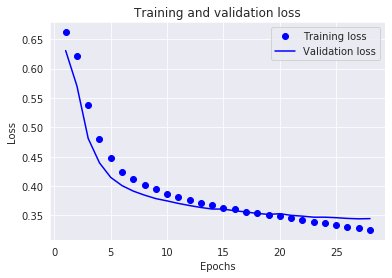

In [ ]:
# Fit the model
history = Sequential_model.fit(X_train, y_train, validation_split=0.33, epochs=28, batch_size=1000)
sns.set_style("darkgrid") 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Calculate outputs in test set
prob_test_GS = Sequential_model.predict(X_test, verbose = 1)
prob_train = Sequential_model.predict(X_train, verbose = 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test_GS)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

121630/121630 [==============================] - 12s 99us/sample

AUC train:  0.9277027624282317
AUC test:  0.9155071780293197


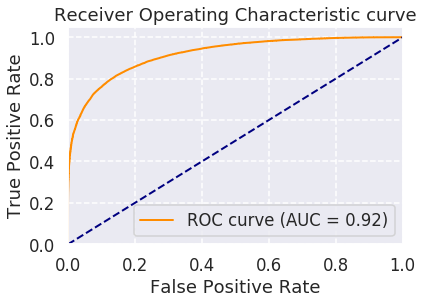

In [ ]:
sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")

# I am saving the output as a PDF for easy exporting.
plt.savefig('roc_auc.pdf', format = "pdf")

# Now I show the plot inline.
plt.show()

In [ ]:
Cutoff = 0.5

In [ ]:
prob_test_GS[prob_test_GS > Cutoff] = 1
prob_test_GS[prob_test_GS <= Cutoff] = 0

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix1 = \
confusion_matrix(y_true = y_test, y_pred = prob_test_GS)

In [ ]:
confusion_matrix1

array([[14758,  4840],
       [ 4596, 35714]])

In [ ]:
len(y_test[y_test == 0] )


19598

In [ ]:
accuracy = (confusion_matrix1[0][0] + confusion_matrix1[1][1])/ \
(confusion_matrix1[0][0] + confusion_matrix1[0][1] + \
 confusion_matrix1[1][0] + confusion_matrix1[1][1])

In [ ]:
accuracy

0.8424918207918809

In [ ]:
Sequential_model_FT = Sequential()

In [ ]:
embedding_layer_Fast = Embedding(len(word_index) + 1,           
                            300,                           
                            weights=[embedding_matrix_Fast],    
                            input_length=175,             
                            trainable=False)               

In [ ]:
Sequential_model_FT.add(embedding_layer_Fast)

In [ ]:
Sequential_model_FT.add(Conv1D(filters=64,          
                        kernel_size=1,         
                        padding='valid',       
                        activation='relu',     
                        strides=1)             
         )

In [ ]:
Sequential_model_FT.add(Conv1D(filters=128,           
                 kernel_size=2,         
                 padding='valid',       
                 activation='relu',     
                 strides=1)             
         )

In [ ]:
Sequential_model_FT.add(MaxPooling1D(pool_size = 4))

In [ ]:
Sequential_model_FT.add(Conv1D(filters=64,          
                 kernel_size=2,        
                 padding='valid',       
                 activation='relu',     
                 strides=1)             
         )

In [ ]:
Sequential_model_FT.add(MaxPooling1D(pool_size = 7))

In [ ]:
# Flatten
Sequential_model_FT.add(Flatten())

# Dense Layer of size 128 with Dropout
Sequential_model_FT.add(Dense(64, activation = 'relu'))
Sequential_model_FT.add(Dropout(0.5))

# Output layer of size 1
Sequential_model_FT.add(Dense(1, activation = 'sigmoid'))

In [ ]:
Sequential_model_FT.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 175, 300)          32507100  
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 175, 64)           19264     
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 174, 128)          16512     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 43, 128)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 42, 64)            16448     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 6, 64)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 384)              

In [ ]:
# Use Adam as optimizer, with a binary_crossentropy error.
adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
Sequential_model_FT.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

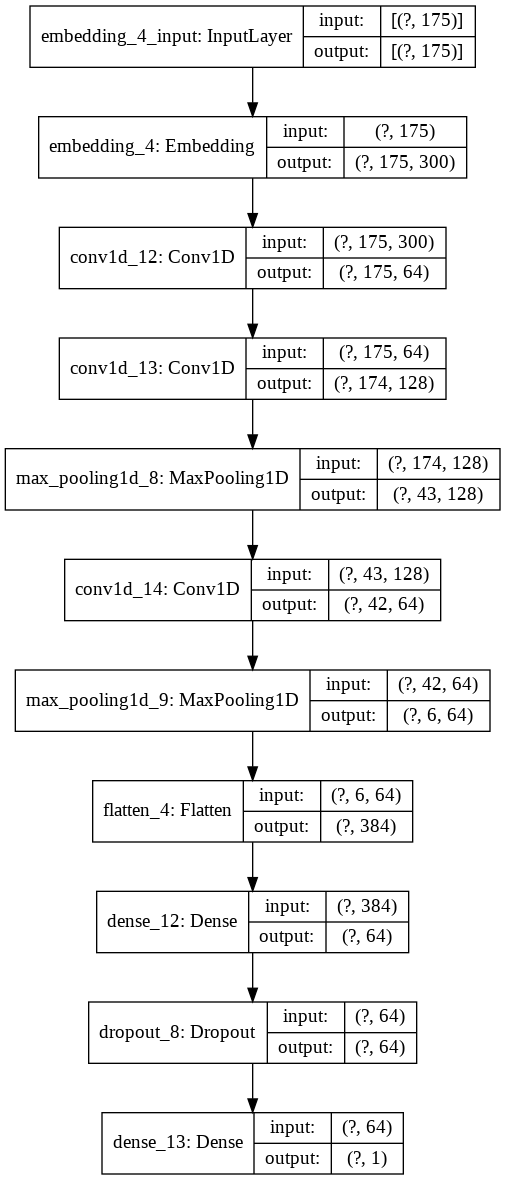

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(Sequential_model_FT, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

Train on 81492 samples, validate on 40138 samples
Epoch 1/28
81492/81492 [==============================] - 9s 109us/sample - loss: 0.5698 - acc: 0.6886 - val_loss: 0.4836 - val_acc: 0.7536
Epoch 2/28
81492/81492 [==============================] - 8s 104us/sample - loss: 0.4449 - acc: 0.7852 - val_loss: 0.4025 - val_acc: 0.8119
Epoch 3/28
81492/81492 [==============================] - 8s 101us/sample - loss: 0.3971 - acc: 0.8149 - val_loss: 0.3801 - val_acc: 0.8202
Epoch 4/28
81492/81492 [==============================] - 8s 103us/sample - loss: 0.3810 - acc: 0.8256 - val_loss: 0.3715 - val_acc: 0.8249
Epoch 5/28
81492/81492 [==============================] - 8s 102us/sample - loss: 0.3738 - acc: 0.8287 - val_loss: 0.3663 - val_acc: 0.8301
Epoch 6/28
81492/81492 [==============================] - 8s 104us/sample - loss: 0.3673 - acc: 0.8331 - val_loss: 0.3619 - val_acc: 0.8312
Epoch 7/28
81492/81492 [==============================] - 9s 105us/sample - loss: 0.3626 - acc: 0.8351 - val_l

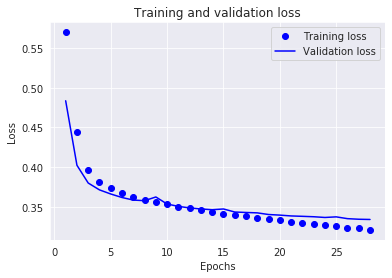

In [ ]:
# Fit the model
history = Sequential_model_FT.fit(X_train, y_train, validation_split=0.33, epochs=28, batch_size=600)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Calculate outputs in test set
prob_test_FS = Sequential_model_FT.predict(X_test, verbose = 1)
prob_train = Sequential_model_FT.predict(X_train, verbose = 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test_FS)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

121630/121630 [==============================] - 11s 94us/sample

AUC train:  0.9271910063294806
AUC test:  0.92077067020316


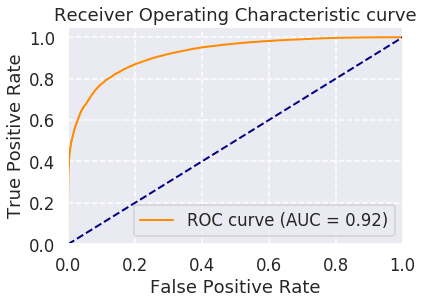

In [ ]:
sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")

# I am saving the output as a PDF for easy exporting.
plt.savefig('roc_auc.pdf', format = "pdf")

# Now I show the plot inline.
plt.show()

In [ ]:
prob_test_FS[prob_test_FS > Cutoff] = 1
prob_test_FS[prob_test_FS <= Cutoff] = 0

In [ ]:
confusion_matrix2 = \
confusion_matrix(y_true = y_test, y_pred = prob_test_FS)

In [ ]:
confusion_matrix2

array([[14679,  4919],
       [ 4159, 36151]])

In [ ]:
# Calculate outputs in test set
prob_test2 = Sequential_model2.predict(undetermined_data, verbose = 1)


# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(undetermind_labels, prob_test2)
roc_auc = auc(fpr, tpr)

22520/22520 [==============================] - 1s 54us/sample


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


In [ ]:
prob_test2 

array([[0.62579656],
       [0.945838  ],
       [0.46042684],
       ...,
       [0.9191065 ],
       [0.9688797 ],
       [0.5518097 ]], dtype=float32)

In [ ]:
len(prob_test2[prob_test2 <0.3]) + len(prob_test2[prob_test2 > 0.7])

15338

In [ ]:
len(prob_test2)

22520

### Kim's Structure 

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

In [ ]:
# Filter sizes to use.
filter_sizes = (1,2,4,5)

# Initialize. We need to give it the input dimension (from the Embedding!)
graph_in = Input(shape=(175, 300))
convs = []
avgs = []

# This for stacks the layers. Inside each for, we build the sequence of layer. The command "append" adds
# that to the "conv" variable, which is simply a stack of convolutions.
for fsz in filter_sizes:
    conv = Conv1D(filters=128,
                  kernel_size=fsz,
                  padding='valid',
                  activation='relu',
                  strides=1)(graph_in)
          
    pool = MaxPooling1D(pool_size= 175 - fsz + 1)(conv) # Put this layer AFTER the convolution just created.
    flattenMax = Flatten()(pool) # Flatten the pooling layer.
    convs.append(flattenMax) # Append this to the convs object that saves the stack.
    
# Concatenate layers.
if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out, name="graphModel")

graph.summary()

Model: "graphModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 175, 300)]   0                                            
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 175, 128)     38528       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 174, 128)     76928       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_20 (Conv1D)              (None, 172, 128)     153728      input_1[0][0]                    
_________________________________________________________________________________________

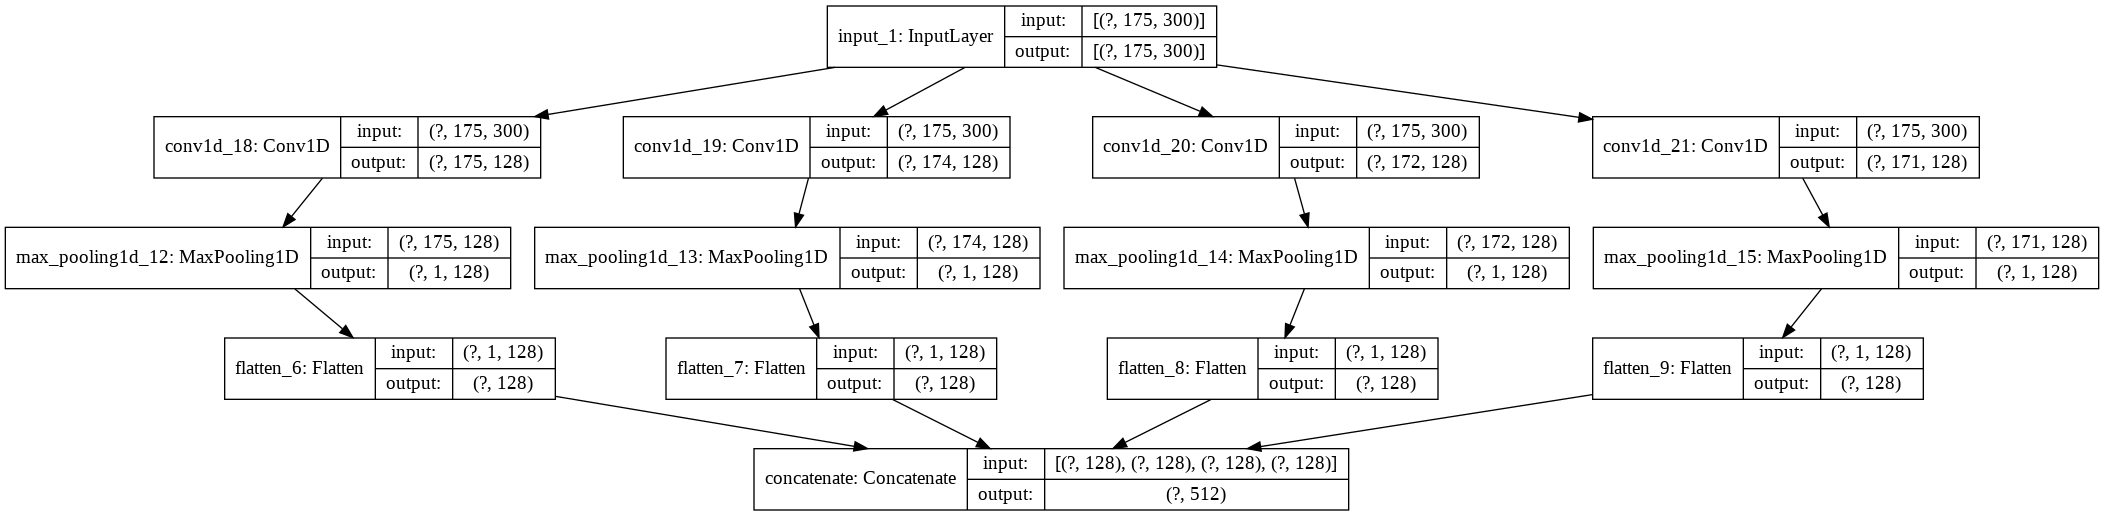

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(graph, show_shapes=True, show_layer_names=True, to_file='GraphModel.png')
Image(retina=True, filename='GraphModel.png')

In [ ]:
# Final model
Kim = Sequential()

Kim.add(embedding_layer_Fast)

# Now we add our graph model
Kim.add(graph)

# Add a few layers
Kim.add(Dense(64, activation='relu'))
Kim.add(Dropout(0.5))
Kim.add(Dense(1, activation='sigmoid'))

# adam = Adam(clipnorm=.1)
Kim.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

In [ ]:
Kim.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 175, 300)          32507100  
_________________________________________________________________
graphModel (Model)           (None, 512)               461312    
_________________________________________________________________
dense_16 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 33,001,309
Trainable params: 494,209
Non-trainable params: 32,507,100
_________________________________________________________________


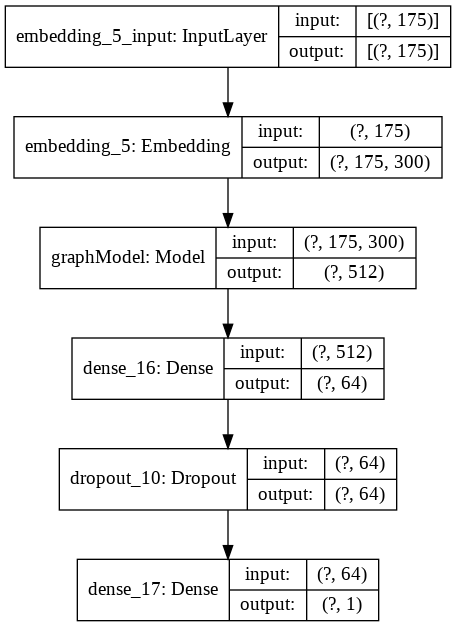

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from IPython.display import Image
%matplotlib inline

plot_model(Kim, show_shapes=True, show_layer_names=True, to_file='model.png')
Image(retina=True, filename='model.png')

Train on 81492 samples, validate on 40138 samples
Epoch 1/9
81492/81492 [==============================] - 57s 694us/sample - loss: 0.4888 - acc: 0.7474 - val_loss: 0.3872 - val_acc: 0.8327
Epoch 2/9
81492/81492 [==============================] - 55s 678us/sample - loss: 0.3735 - acc: 0.8370 - val_loss: 0.3444 - val_acc: 0.8473
Epoch 3/9
81492/81492 [==============================] - 56s 685us/sample - loss: 0.3382 - acc: 0.8542 - val_loss: 0.3215 - val_acc: 0.8576
Epoch 4/9
81492/81492 [==============================] - 56s 682us/sample - loss: 0.3210 - acc: 0.8629 - val_loss: 0.3120 - val_acc: 0.8624
Epoch 5/9
81492/81492 [==============================] - 56s 686us/sample - loss: 0.3050 - acc: 0.8707 - val_loss: 0.3061 - val_acc: 0.8641
Epoch 6/9
81492/81492 [==============================] - 56s 682us/sample - loss: 0.2954 - acc: 0.8758 - val_loss: 0.3033 - val_acc: 0.8666
Epoch 7/9
81492/81492 [==============================] - 56s 683us/sample - loss: 0.2846 - acc: 0.8820 - val_l

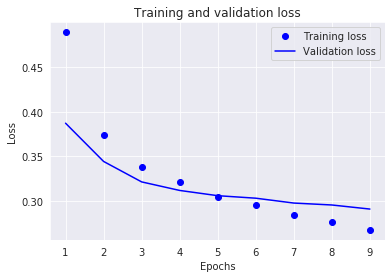

In [ ]:
history = Kim.fit(X_train, y_train, validation_split=0.33, epochs=9, batch_size=600)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

121630/121630 [==============================] - 29s 239us/sample

AUC train:  0.9532259079751589
AUC test:  0.9417653056401418


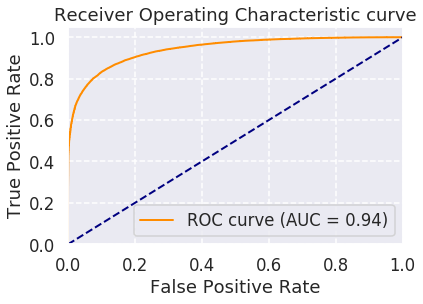

In [ ]:
# Calculate outputs in test set
prob_test_FK = Kim.predict(X_test, verbose = 1)
prob_train = Kim.predict(X_train, verbose = 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test_FK)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

In [ ]:
prob_test_FK[prob_test_FK > Cutoff] = 1
prob_test_FK[prob_test_FK <= Cutoff] = 0

In [ ]:
confusion_matrix3 = \
confusion_matrix(y_true = y_test, y_pred = prob_test_FK)

In [ ]:
confusion_matrix3

array([[15506,  4092],
       [ 3658, 36652]])

In [ ]:
Kim_G = Sequential()

Kim_G.add(embedding_layer_Glove)

# Now we add our graph model
Kim_G.add(graph)

# Add a few layers
Kim_G.add(Dense(64, activation='relu'))
Kim_G.add(Dropout(0.5))
Kim_G.add(Dense(1, activation='sigmoid'))

# adam = Adam(clipnorm=.1)
Kim_G.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

Train on 81492 samples, validate on 40138 samples
Epoch 1/9
81492/81492 [==============================] - 55s 681us/sample - loss: 0.4692 - acc: 0.7662 - val_loss: 0.3695 - val_acc: 0.8286
Epoch 2/9
81492/81492 [==============================] - 55s 671us/sample - loss: 0.3602 - acc: 0.8351 - val_loss: 0.3383 - val_acc: 0.8438
Epoch 3/9
81492/81492 [==============================] - 55s 670us/sample - loss: 0.3298 - acc: 0.8536 - val_loss: 0.3249 - val_acc: 0.8502
Epoch 4/9
81492/81492 [==============================] - 55s 678us/sample - loss: 0.3083 - acc: 0.8639 - val_loss: 0.3163 - val_acc: 0.8551
Epoch 5/9
81492/81492 [==============================] - 55s 680us/sample - loss: 0.2932 - acc: 0.8726 - val_loss: 0.3159 - val_acc: 0.8537
Epoch 6/9
81492/81492 [==============================] - 56s 687us/sample - loss: 0.2789 - acc: 0.8803 - val_loss: 0.3099 - val_acc: 0.8589
Epoch 7/9
81492/81492 [==============================] - 55s 680us/sample - loss: 0.2648 - acc: 0.8892 - val_l

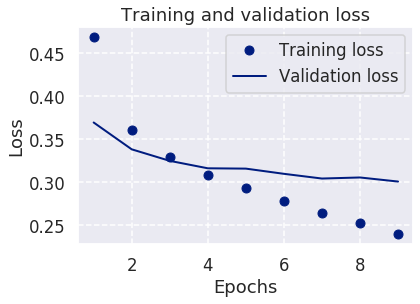

In [ ]:
history = Kim_G.fit(X_train, y_train, validation_split=0.33, epochs=9, batch_size=600)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

121630/121630 [==============================] - 31s 259us/sample

AUC train:  0.9610499658618654
AUC test:  0.9371429013926638


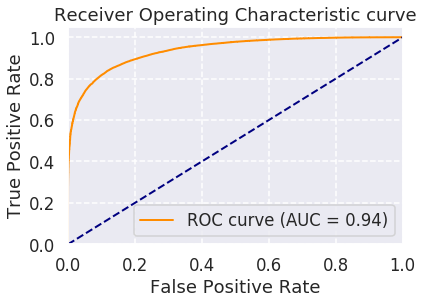

In [ ]:
# Calculate outputs in test set
prob_test_GK = Kim_G.predict(X_test, verbose = 1)
prob_train = Kim_G.predict(X_train, verbose = 1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_train, prob_train)
roc_auc = auc(fpr, tpr)
print('\nAUC train: ', roc_auc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, prob_test_GK)
roc_auc = auc(fpr, tpr)
print('AUC test: ', roc_auc)

sns.set('talk', 'darkgrid', 'dark', font_scale=1, \
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.savefig('roc_auc.pdf', format = "pdf")
plt.show()

In [ ]:
prob_test_GK[prob_test_GK > Cutoff] = 1
prob_test_GK[prob_test_GK <= Cutoff] = 0

In [ ]:
confusion_matrix4 = \
confusion_matrix(y_true = y_test, y_pred = prob_test_GK)

In [ ]:
confusion_matrix4

array([[15656,  3942],
       [ 4270, 36040]])

##Performance

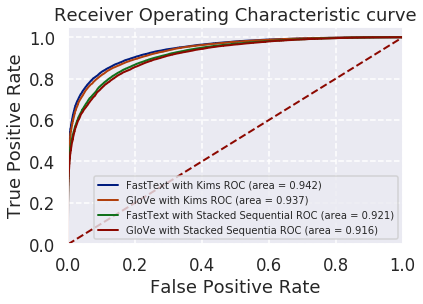

In [ ]:
models = [
{
    'label': 'FastText with Kims',
    'probs': prob_test_FK
},
{
    'label': 'GloVe with Kims',
    'probs': prob_test_GK
},
{
    'label': 'FastText with Stacked Sequential',
    'probs': prob_test_FS
}, 
{
    'label': 'GloVe with Stacked Sequentia',
    'probs': prob_test_GS
}
]


for m in models:

  fpr, tpr, thresholds = roc_curve(y_test.astype('float'), 
                                           m['probs'])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], roc_auc))
                 
lw = 2
# Settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right", prop={"size":10})
    
# Plot!    
plt.show()